In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

text     0
label    0
dtype: int64
label
1    1703
0    1443
3     671
4     584
2     401
5     198
Name: count, dtype: int64


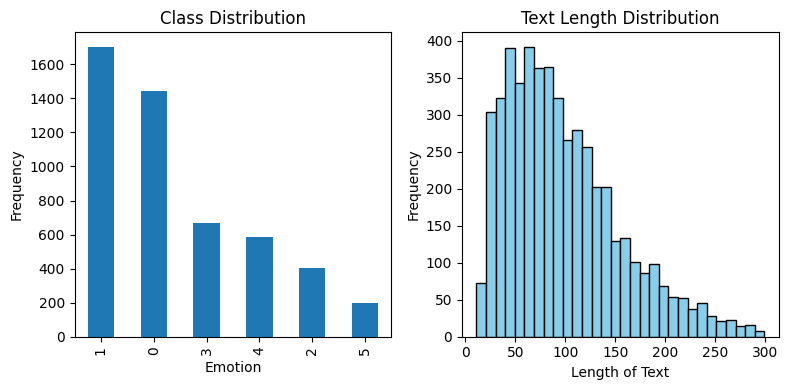

In [23]:
data = []
with open('dataset.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

missing_values = df.isnull().sum()

print(missing_values)


class_distribution = df['label'].value_counts()

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
class_distribution.plot(kind='bar', title='Class Distribution', xlabel='Emotion', ylabel='Frequency')
print(class_distribution)

df['text_length'] = df['text'].apply(len)
text_length_stats = df['text_length'].describe()

plt.subplot(1, 2, 2)
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [3]:
train_data, test_data = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, stratify=train_data['label'], random_state=42)

train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)
val_data.to_csv('val.csv', index=False)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train = vectorizer.fit_transform(train_data['text']).toarray()
X_val = vectorizer.transform(val_data['text']).toarray()
X_test = vectorizer.transform(test_data['text']).toarray()

y_train = train_data['label'].values
y_val = val_data['label'].values
y_test = test_data['label'].values

Decision Tree Validation Accuracy: 0.847
[[260   8   3   7   8   3]
 [ 14 286  20   7   9   4]
 [  3  12  64   0   1   0]
 [  6   5   0 119   3   1]
 [  8  12   2   1  85   9]
 [  1   2   0   1   3  33]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       289
           1       0.88      0.84      0.86       340
           2       0.72      0.80      0.76        80
           3       0.88      0.89      0.88       134
           4       0.78      0.73      0.75       117
           5       0.66      0.82      0.73        40

    accuracy                           0.85      1000
   macro avg       0.80      0.83      0.81      1000
weighted avg       0.85      0.85      0.85      1000



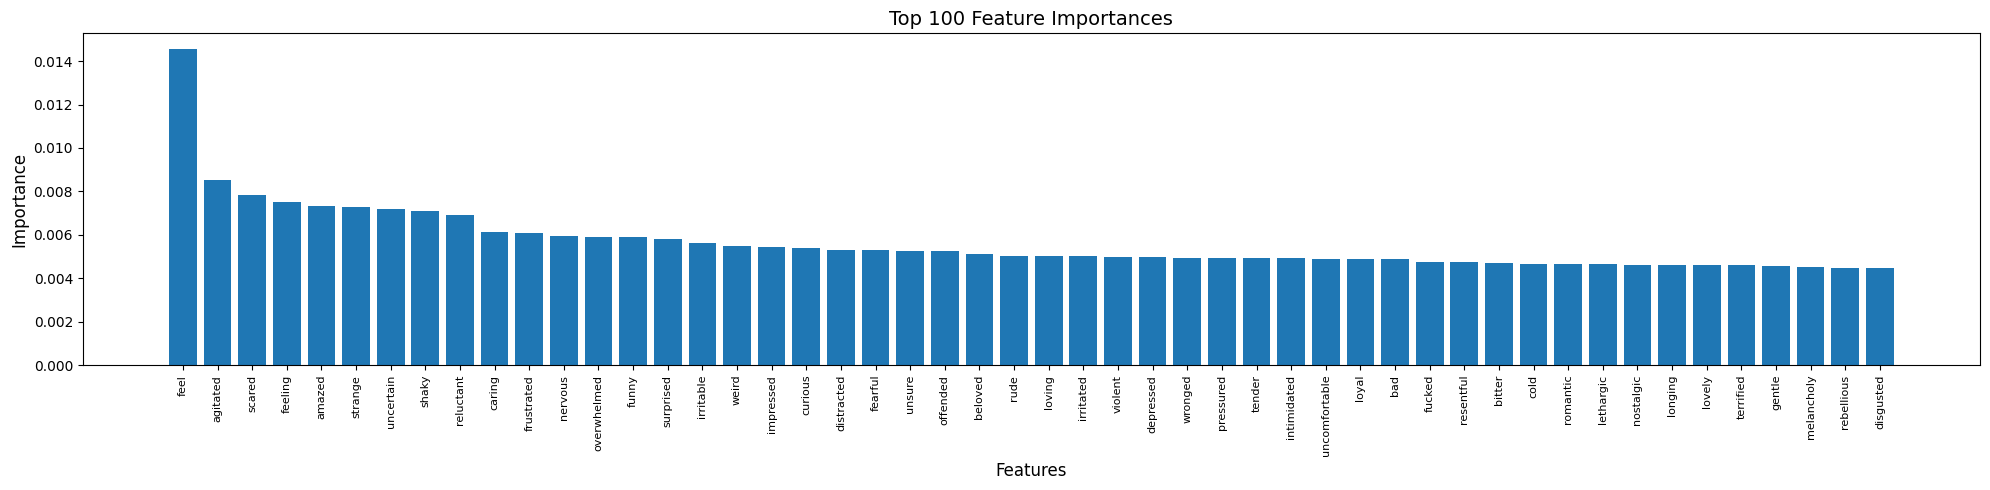

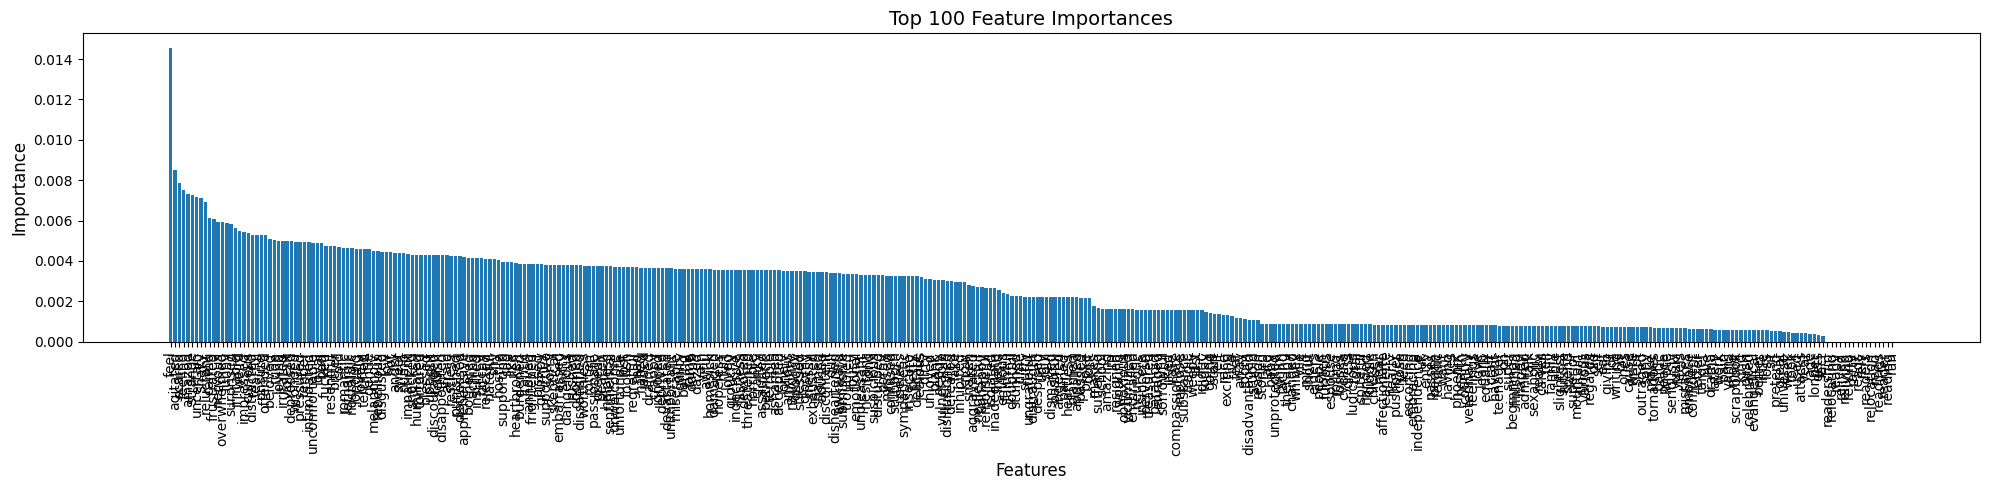

In [22]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Validation Accuracy:", accuracy_score(y_test, dt_predictions))
print(confusion_matrix(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))
dt_model.feature_importances_
# features = pd.DataFrame(dt_model.feature_importances_, index=vectorizer.get_feature_names_out(), columns=['Importance'])

# features.head(50)


feature_importances = pd.DataFrame({
    'Feature': vectorizer.get_feature_names_out(),
    'Importance': dt_model.feature_importances_
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importances_50 = feature_importances.head(50)

plt.figure(figsize=(20, 5))
plt.bar(feature_importances_50['Feature'], feature_importances_50['Importance'])
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Top 100 Feature Importances', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

top_100_features = feature_importances.head(400)

plt.figure(figsize=(20, 5))
plt.bar(top_100_features['Feature'], top_100_features['Importance'])
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.title('Top 100 Feature Importances', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()


# 1 joy    1703 ---------> love = 12, fear = 12
# 0 sad    1443
# 3 anger     671
# 4 fear     584
# 2 love     401 ----------> joy = 20, 
# 5 surprise     198 ----------> fear = 9
#

In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Validation Accuracy:", accuracy_score(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

Random Forest Validation Accuracy: 0.82
[[232  39   2   5   8   3]
 [ 12 304  11   4   5   4]
 [  3  20  56   0   1   0]
 [  5  12   0 113   4   0]
 [  5  21   1   1  79  10]
 [  0   3   0   0   1  36]]


In [26]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_val)
print("Gradient Boosting Validation Accuracy:", accuracy_score(y_val, gb_predictions))

Gradient Boosting Validation Accuracy: 0.804
